In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\asd\Desktop\Diabetes_Prediction\notebook\data\diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
cat = ['Pregnancies','Outcome']

In [12]:
categorical_features = [column for column in df.columns if df[column].dtype == 'O']
numeric_features = [column for column in df.columns if df[column].dtype != 'O']

print(f"The {len(categorical_features)} Categorical features are: {categorical_features}")
print(f"The {len(numeric_features)} Categorical features are: {numeric_features}")

The 0 Categorical features are: []
The 9 Categorical features are: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## Univarient

### Categorical Columns

<Axes: xlabel='Pregnancies', ylabel='count'>

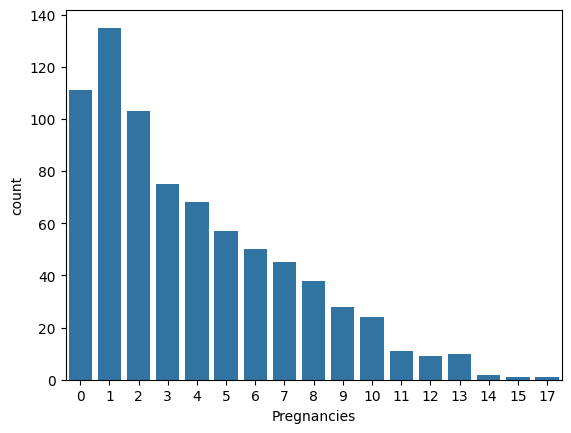

In [9]:
sns.countplot(data=df, x='Pregnancies')

<Axes: xlabel='Outcome', ylabel='count'>

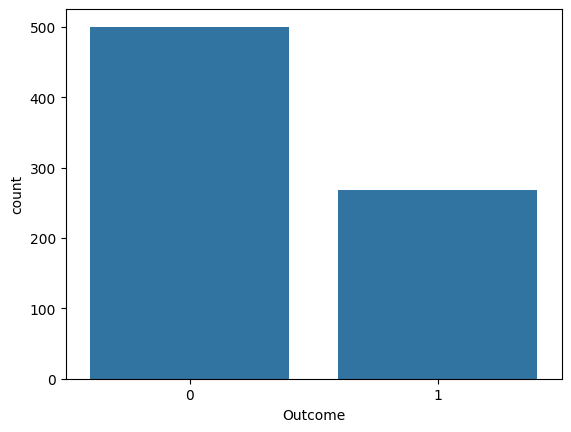

In [10]:
sns.countplot(data=df, x='Outcome')

### Numerical Columns

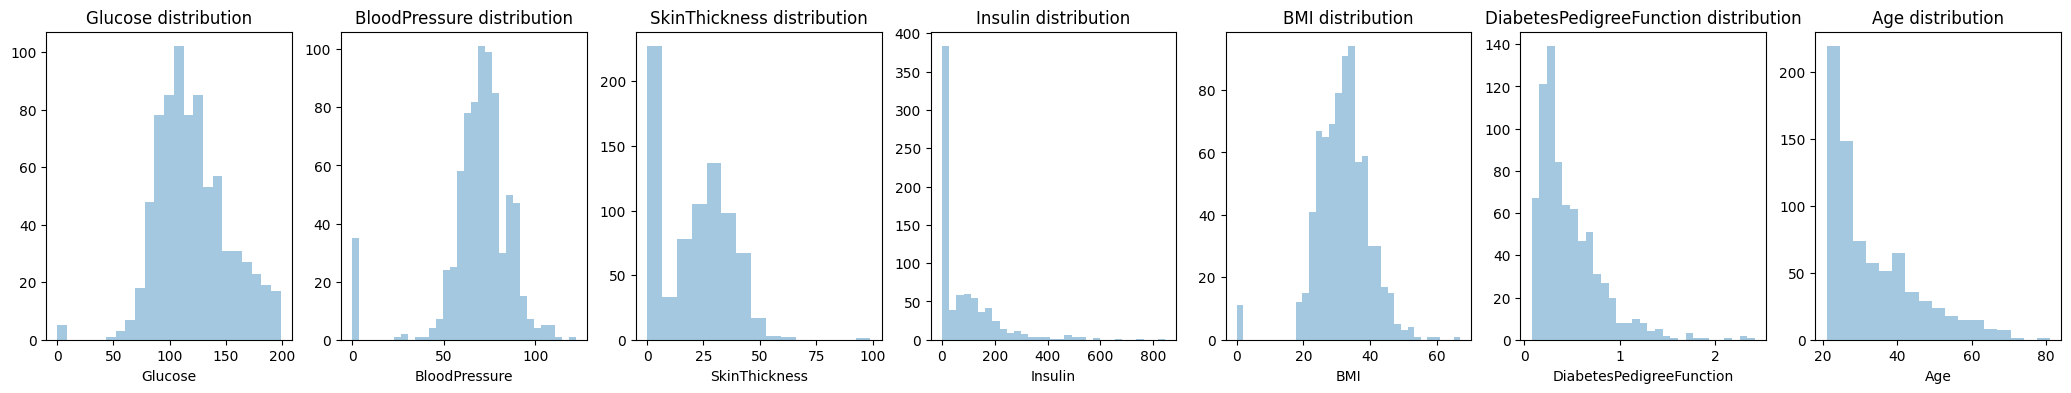

In [25]:
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(26, 4))

for index, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    sns.distplot(df[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

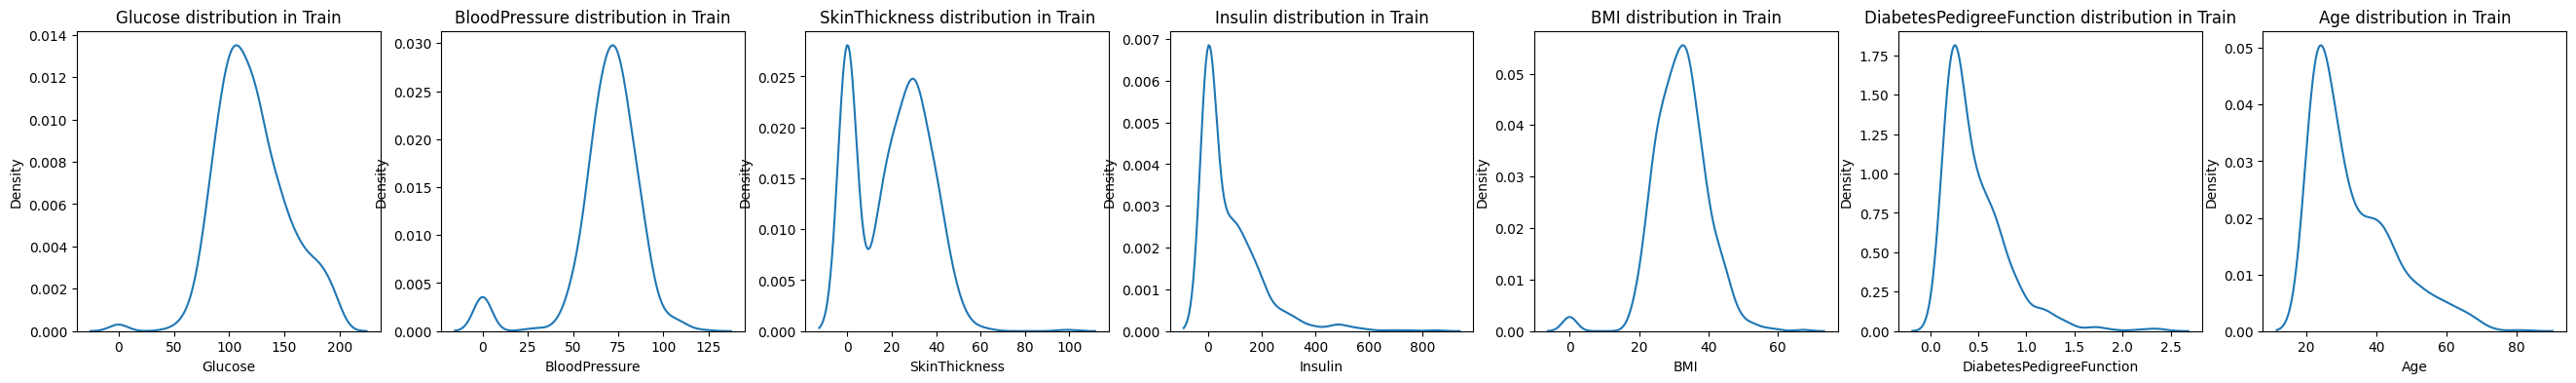

In [22]:
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(33, 4))

for index, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    sns.kdeplot(data=df, x=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Train')

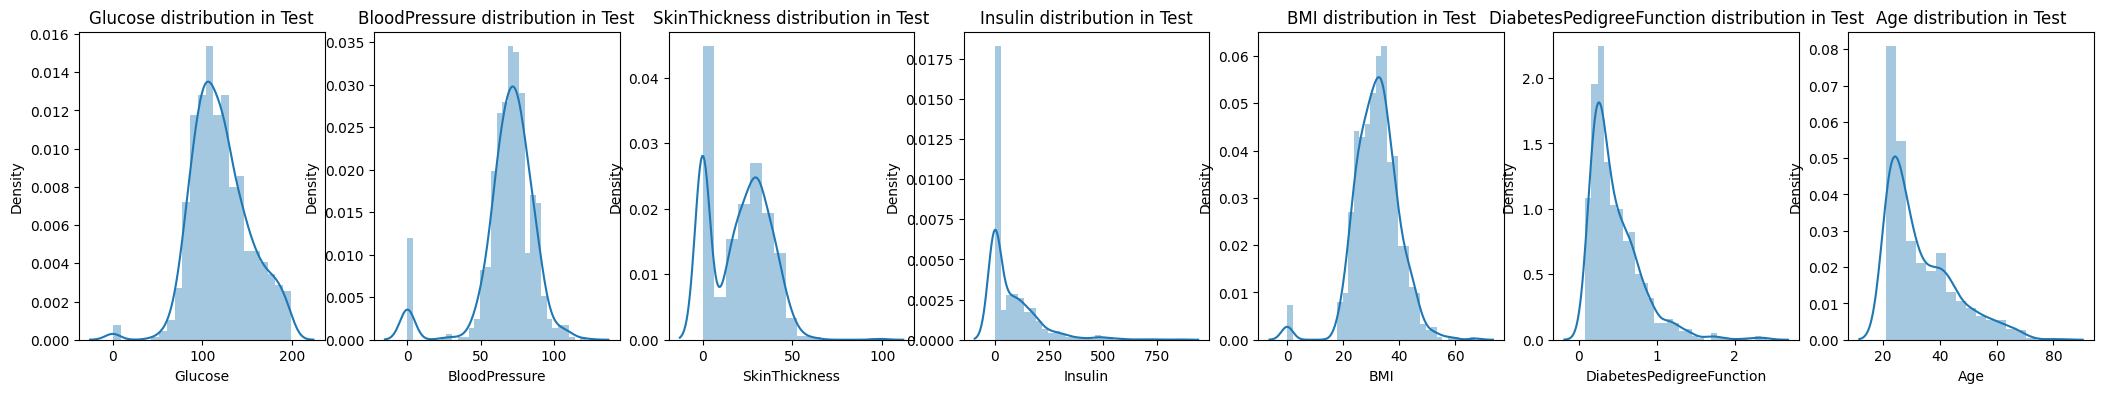

In [26]:
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(26, 4))

for index, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    sns.distplot(df[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test')

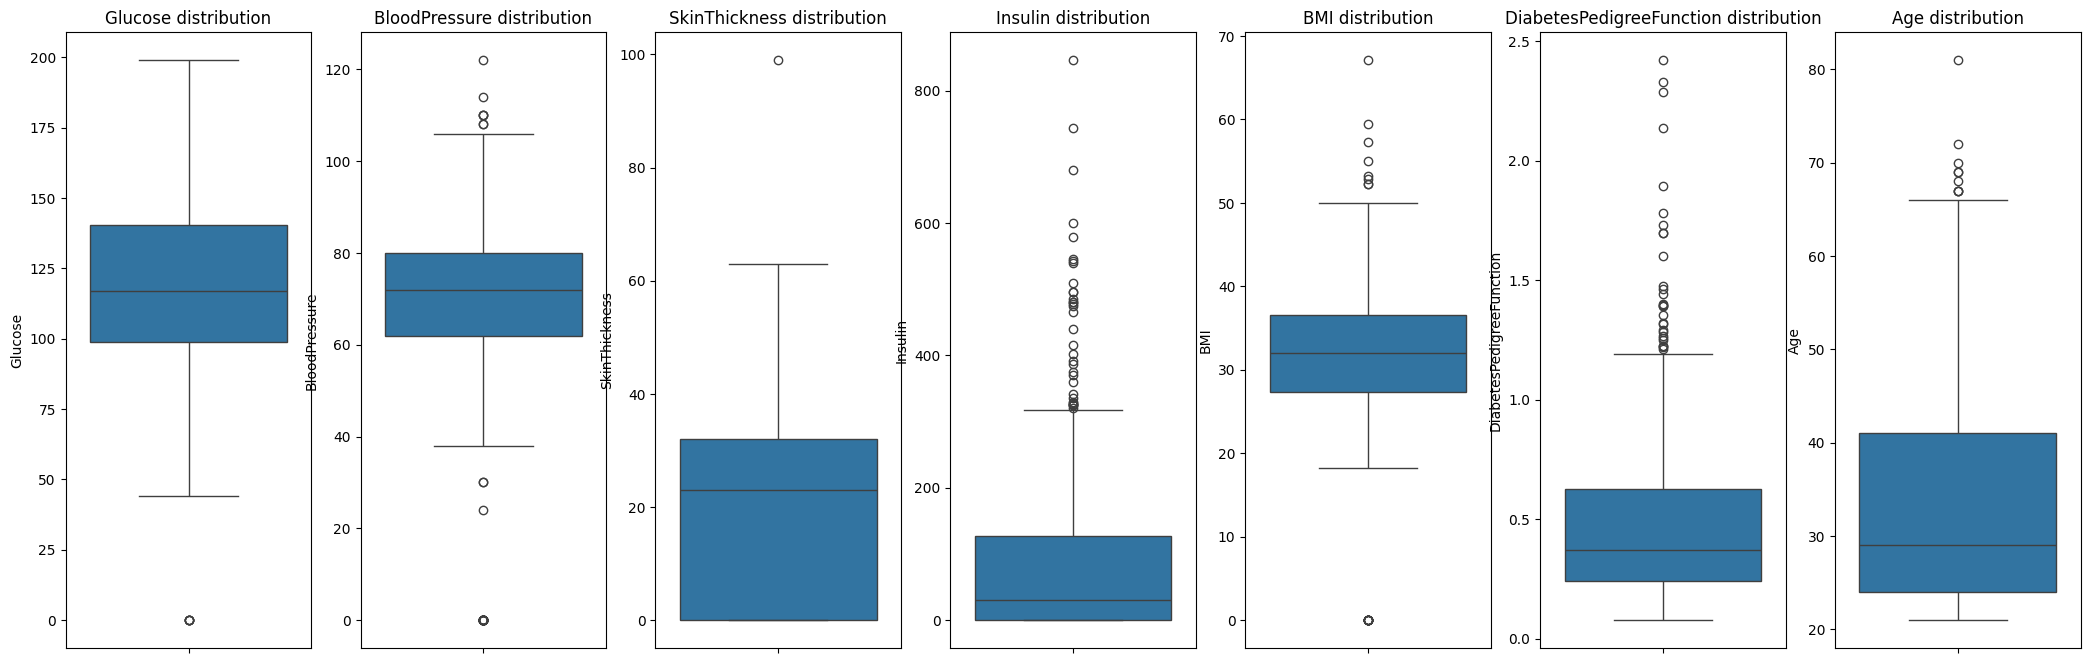

In [27]:
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(26,8))
for index, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    sns.boxplot(data=df, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

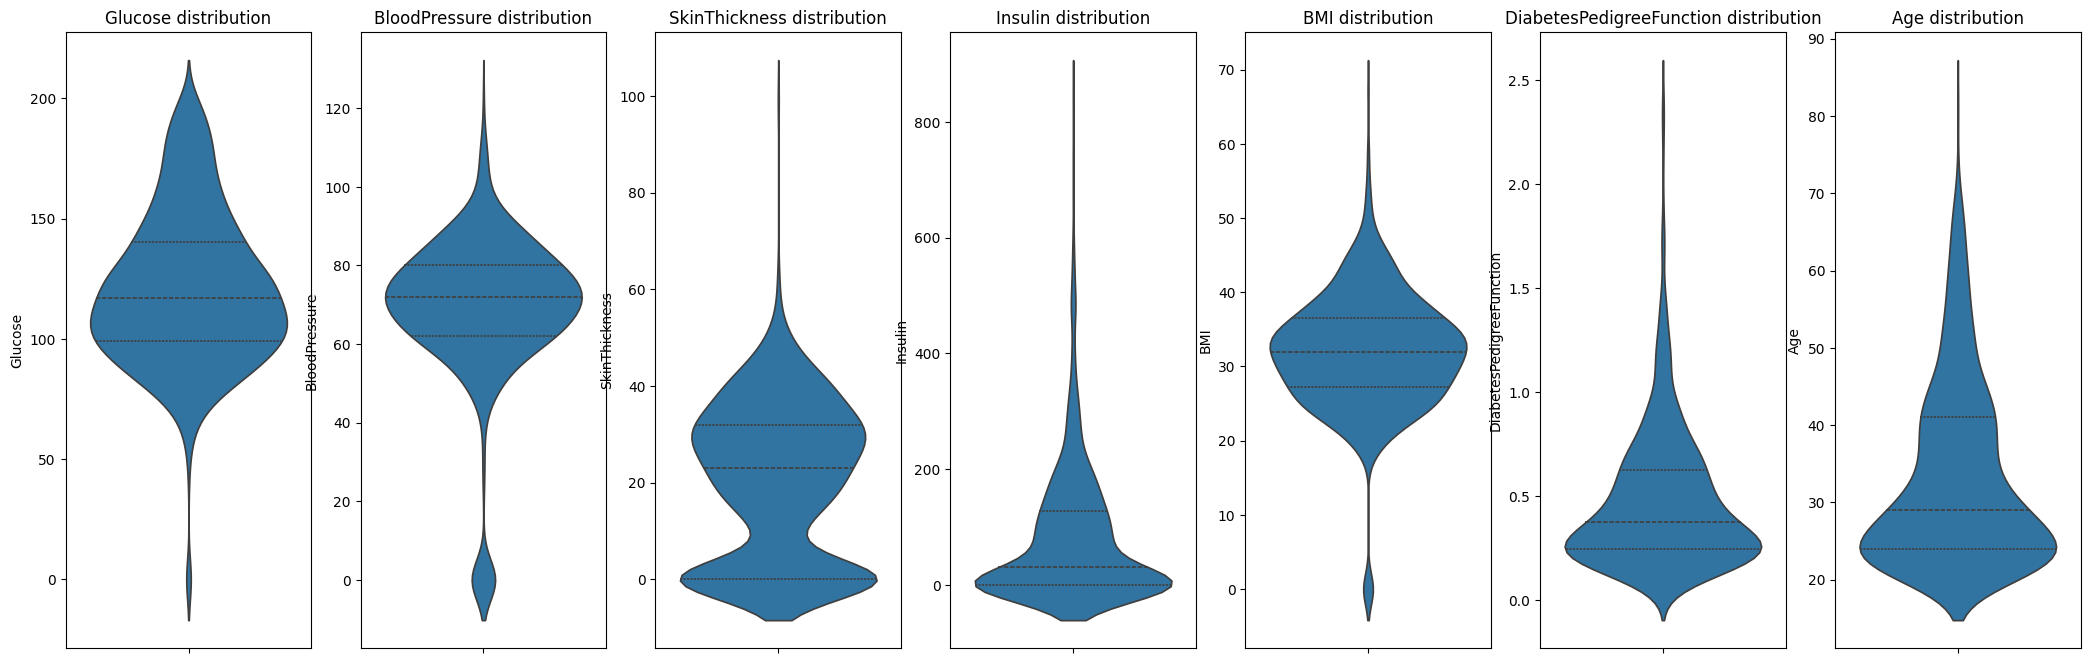

In [28]:
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(26,8))
for index, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    sns.violinplot(data=df, y=col, ax=ax[index], inner='quartile')
    ax[index].set_title(f'{col} distribution')

### Bi-Varient

### MultiVarient

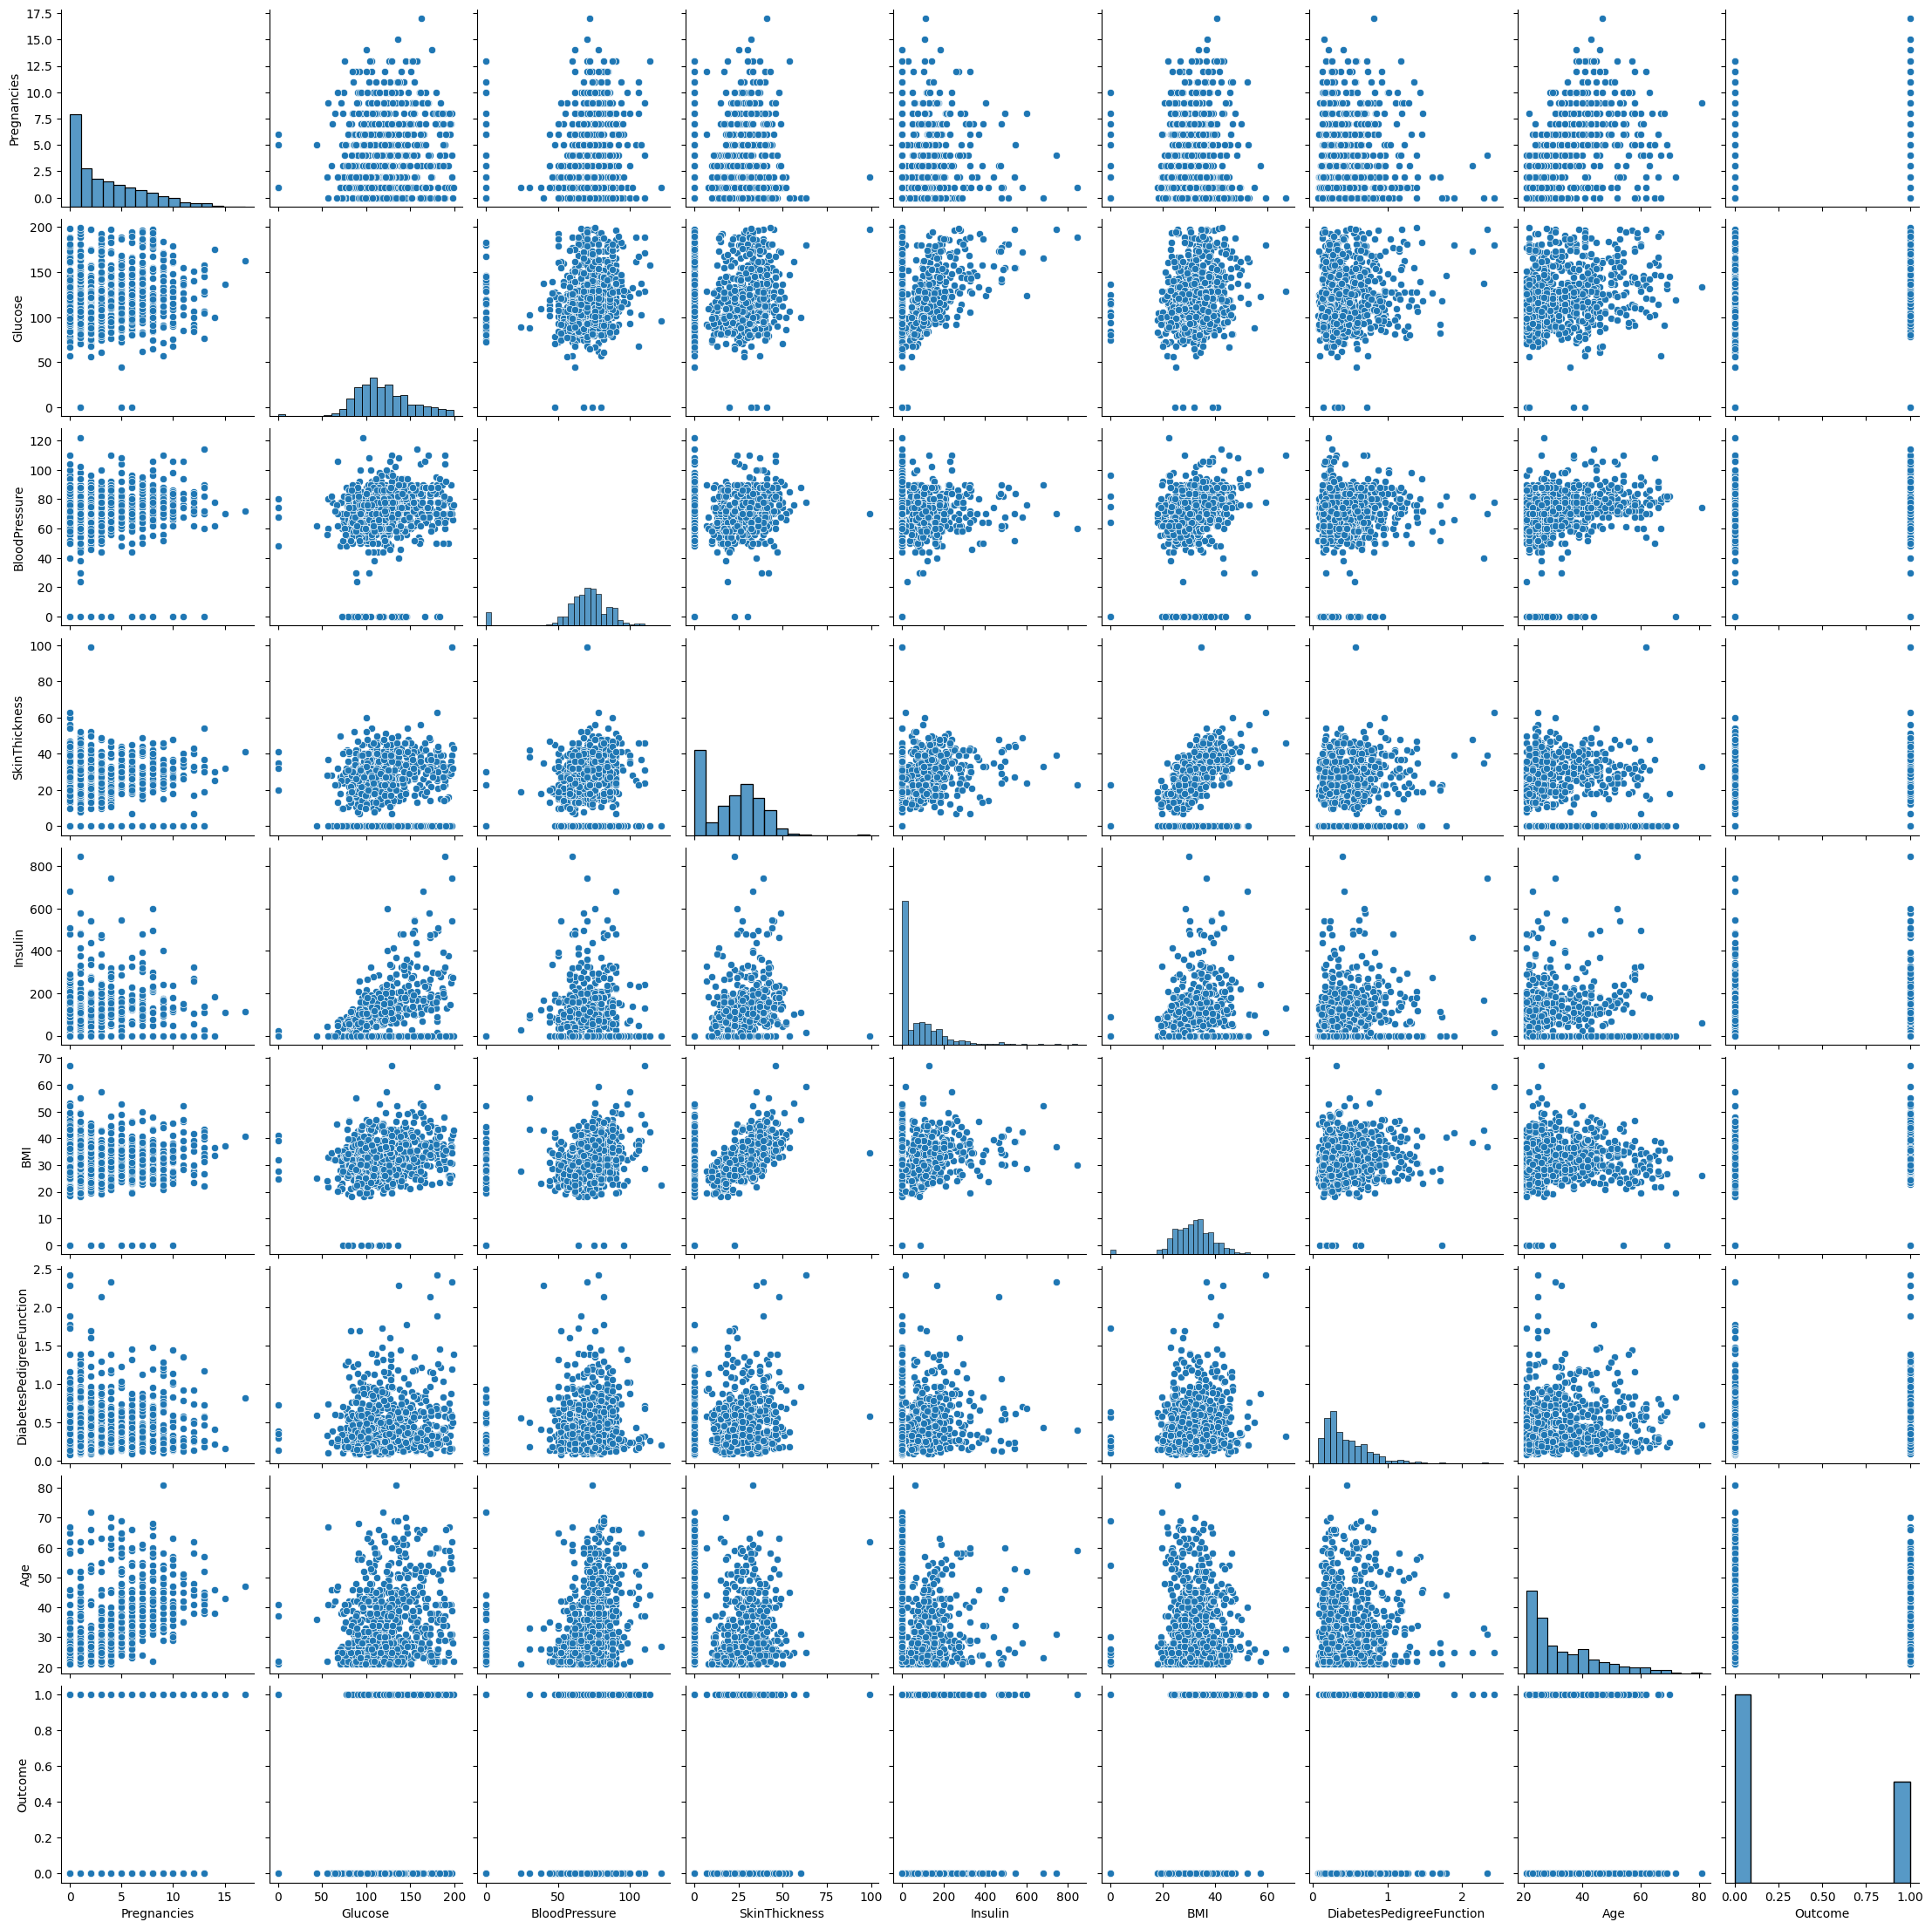

In [29]:
sns.pairplot(data=df)

In [31]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


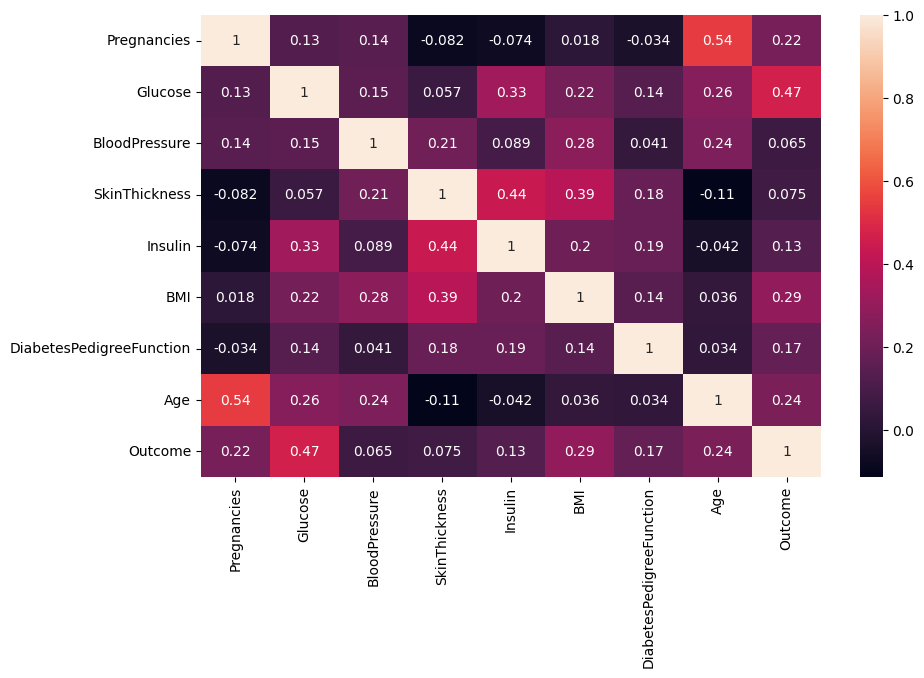

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(),annot=True)
plt.show()